In [217]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [218]:
X, y = make_classification(n_samples=200,n_features=5,n_informative=5,n_redundant=0,n_clusters_per_class=1)    

In [219]:
df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])

In [220]:
df['target'] = y

In [221]:
df.head()

,col1,col2,col3,col4,col5,target
0,-0.007954,0.427971,-1.699997,0.132572,-0.782404,0
1,1.535902,1.512643,-0.454345,-1.835000,-2.159058,0
2,-0.530825,0.879685,-1.253806,-3.037382,-1.561241,0
3,1.213445,3.106169,-1.379597,-0.229552,-2.097955,0
4,2.763996,1.020127,-2.325664,-0.778210,3.257414,1


In [222]:
df.shape

(200, 6)

In [223]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [224]:
df.columns.tolist()[:-1]

['col1', 'col2', 'col3', 'col4', 'col5']

In [225]:
df[['col1', 'col2', 'col3', 'col4', 'col5']]

,col1,col2,col3,col4,col5
0,-0.007954,0.427971,-1.699997,0.132572,-0.782404
1,1.535902,1.512643,-0.454345,-1.835000,-2.159058
2,-0.530825,0.879685,-1.253806,-3.037382,-1.561241
3,1.213445,3.106169,-1.379597,-0.229552,-2.097955
4,2.763996,1.020127,-2.325664,-0.778210,3.257414
...,...,...,...,...,...
195,1.824222,-0.199129,-1.573533,-1.337522,1.070007
196,-1.729155,1.957117,-0.489471,-0.311708,-1.329995
197,-1.467355,0.829725,-1.677656,-3.373394,0.246867
198,0.211257,1.415099,0.085549,-2.217487,-1.435250


In [226]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df
     

In [227]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

# **For Sample Rows**

In [228]:
df1 = sample_rows(df, 1)

df2 = sample_rows(df, 1)

df3 = sample_rows(df, 1)

In [229]:
df3.shape

(200, 6)

In [230]:
df1.head()

,col1,col2,col3,col4,col5,target
59,-1.665819,1.587497,-1.024653,-4.255981,-0.603580,0
93,2.638073,0.343674,-0.449097,0.839283,-2.026484,0
9,0.758727,2.090781,-1.456216,-2.661408,-2.907665,0
52,0.325407,0.273694,-1.139234,-2.098157,-1.615007,0
191,-1.282194,1.240412,-0.210676,-0.656069,-1.034613,1


In [231]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [233]:
clf1.fit(df1.iloc[:, 0:5], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:5], df1.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:5], df1.iloc[:, -1])

DecisionTreeClassifier()

In [234]:
from sklearn.tree import plot_tree

[Text(0.4880952380952381, 0.9444444444444444, 'x[4] <= 0.118\ngini = 0.497\nsamples = 200\nvalue = [92, 108]'),
 Text(0.21428571428571427, 0.8333333333333334, 'x[0] <= -1.195\ngini = 0.384\nsamples = 112\nvalue = [83.0, 29.0]'),
 Text(0.09523809523809523, 0.7222222222222222, 'x[3] <= -2.486\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.047619047619047616, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.14285714285714285, 0.6111111111111112, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.3333333333333333, 0.7222222222222222, 'x[1] <= -1.14\ngini = 0.329\nsamples = 101\nvalue = [80, 21]'),
 Text(0.23809523809523808, 0.6111111111111112, 'x[3] <= -0.743\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.19047619047619047, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.42857142857142855, 0.6111111111111112, 'x[2] <= -2.624\ngini = 0.258\nsamples = 92\nvalue = [78, 14

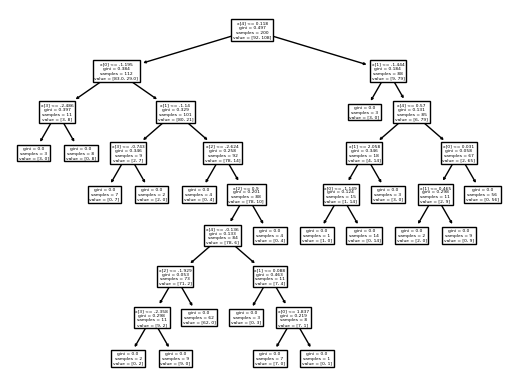

In [235]:
plot_tree(clf1)

[Text(0.50078125, 0.9615384615384616, 'x[2] <= -1.489\ngini = 0.497\nsamples = 200\nvalue = [92, 108]'),
 Text(0.2703125, 0.8846153846153846, 'x[1] <= -0.118\ngini = 0.488\nsamples = 71\nvalue = [41, 30]'),
 Text(0.25364583333333335, 0.8076923076923077, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.2869791666666667, 0.8076923076923077, 'x[0] <= 1.952\ngini = 0.495\nsamples = 67\nvalue = [37, 30]'),
 Text(0.17395833333333333, 0.7307692307692307, 'x[0] <= -0.742\ngini = 0.477\nsamples = 56\nvalue = [34, 22]'),
 Text(0.075, 0.6538461538461539, 'x[3] <= -0.603\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.058333333333333334, 0.5769230769230769, 'x[1] <= 0.911\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.041666666666666664, 0.5, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.075, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.09166666666666666, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.27291666666666664, 0.6538461538461539, 

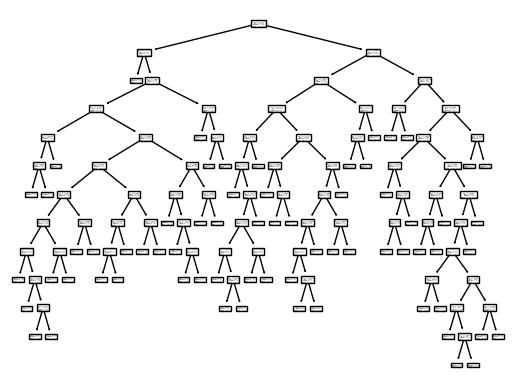

In [236]:
plot_tree(clf2)

[Text(0.6080426356589147, 0.9666666666666667, 'x[2] <= -0.875\ngini = 0.497\nsamples = 200\nvalue = [92, 108]'),
 Text(0.4641472868217054, 0.9, 'x[1] <= 2.158\ngini = 0.498\nsamples = 133\nvalue = [71, 62]'),
 Text(0.33527131782945735, 0.8333333333333334, 'x[4] <= 0.726\ngini = 0.483\nsamples = 98\nvalue = [58, 40]'),
 Text(0.22868217054263565, 0.7666666666666667, 'x[1] <= 0.965\ngini = 0.496\nsamples = 79\nvalue = [43, 36]'),
 Text(0.10852713178294573, 0.7, 'x[4] <= -0.927\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.07751937984496124, 0.6333333333333333, 'x[3] <= -2.995\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.06201550387596899, 0.5666666666666667, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.09302325581395349, 0.5666666666666667, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.13953488372093023, 0.6333333333333333, 'x[4] <= -0.691\ngini = 0.495\nsamples = 40\nvalue = [22, 18]'),
 Text(0.12403100775193798, 0.5666666666666667, 'gini = 0.0\nsamples

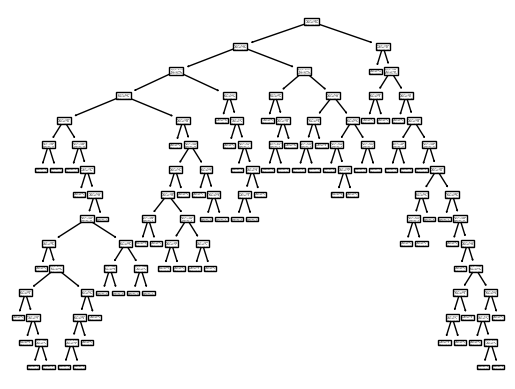

In [239]:
plot_tree(clf3)

In [240]:
clf1.predict(np.array([-0.480376,	0.505291,	-2.774346,	-1.630461,	-1.487884]).reshape(1,5))

C:\Users\TALHA PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [241]:
clf2.predict(np.array([-0.380376,	0.405291,	-1.774346,	-0.630461,	-0.487884]).reshape(1,5))

C:\Users\TALHA PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [242]:
clf3.predict(np.array([-0.380376,	0.405291,	-1.774346,	-0.630461,	-0.487884]).reshape(1,5))

C:\Users\TALHA PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# **For Sample Features**

In [243]:
df1 = sample_features(df, 0.8)

df2 = sample_features(df, 0.8)

df3 = sample_features(df, 0.8)

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_1444\4163128838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_1444\4163128838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_1444\4163128838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [244]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [245]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:4], df1.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:4], df1.iloc[:, -1])

DecisionTreeClassifier()

[Text(0.5443548387096774, 0.9545454545454546, 'x[3] <= -0.127\ngini = 0.5\nsamples = 200\nvalue = [99, 101]'),
 Text(0.33064516129032256, 0.8636363636363636, 'x[1] <= 0.323\ngini = 0.353\nsamples = 105\nvalue = [81, 24]'),
 Text(0.16129032258064516, 0.7727272727272727, 'x[0] <= -0.704\ngini = 0.498\nsamples = 32\nvalue = [17, 15]'),
 Text(0.06451612903225806, 0.6818181818181818, 'x[0] <= -2.105\ngini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(0.03225806451612903, 0.5909090909090909, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.0967741935483871, 0.5909090909090909, 'x[2] <= -0.309\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.06451612903225806, 0.5, 'x[2] <= -1.246\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.03225806451612903, 0.4090909090909091, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.0967741935483871, 0.4090909090909091, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.12903225806451613, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Te

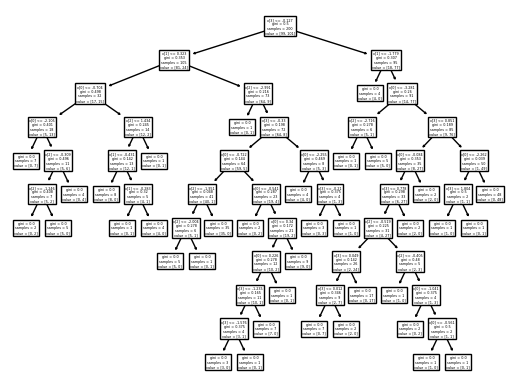

In [246]:
plot_tree(clf1)

[Text(0.5477941176470589, 0.9545454545454546, 'x[2] <= -0.127\ngini = 0.5\nsamples = 200\nvalue = [99, 101]'),
 Text(0.3161764705882353, 0.8636363636363636, 'x[0] <= 0.323\ngini = 0.353\nsamples = 105\nvalue = [81, 24]'),
 Text(0.14705882352941177, 0.7727272727272727, 'x[3] <= -0.704\ngini = 0.498\nsamples = 32\nvalue = [17, 15]'),
 Text(0.058823529411764705, 0.6818181818181818, 'x[3] <= -2.105\ngini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(0.029411764705882353, 0.5909090909090909, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.08823529411764706, 0.5909090909090909, 'x[1] <= -0.309\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.058823529411764705, 0.5, 'x[1] <= -1.246\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.029411764705882353, 0.4090909090909091, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.08823529411764706, 0.4090909090909091, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.11764705882352941, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')

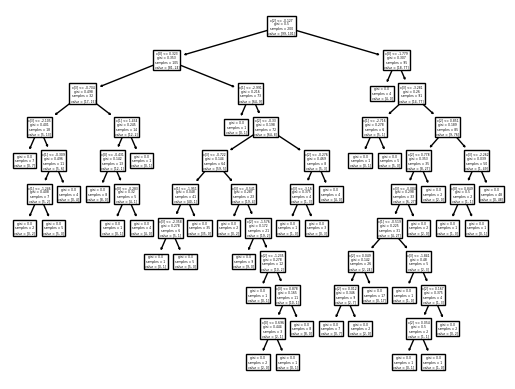

In [247]:
plot_tree(clf2)

[Text(0.5574324324324325, 0.9444444444444444, 'x[0] <= -0.127\ngini = 0.5\nsamples = 200\nvalue = [99, 101]'),
 Text(0.2905405405405405, 0.8333333333333334, 'x[2] <= 0.323\ngini = 0.353\nsamples = 105\nvalue = [81, 24]'),
 Text(0.14864864864864866, 0.7222222222222222, 'x[3] <= 0.63\ngini = 0.498\nsamples = 32\nvalue = [17, 15]'),
 Text(0.05405405405405406, 0.6111111111111112, 'x[1] <= -1.246\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.02702702702702703, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.08108108108108109, 0.5, 'x[1] <= -0.323\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.05405405405405406, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.10810810810810811, 0.3888888888888889, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.24324324324324326, 0.6111111111111112, 'x[3] <= 2.557\ngini = 0.434\nsamples = 22\nvalue = [15.0, 7.0]'),
 Text(0.21621621621621623, 0.5, 'x[1] <= -0.354\ngini = 0.375\nsamples = 20\nvalue = [15, 5]')

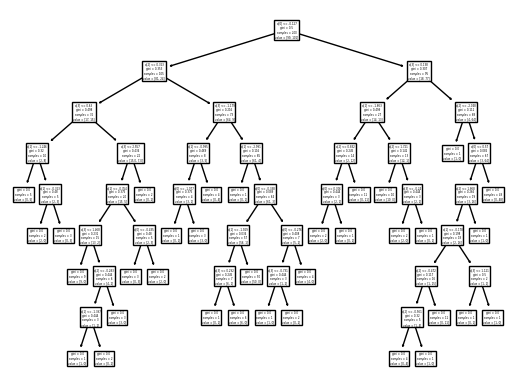

In [248]:
plot_tree(clf3)

# **For Combination**

In [252]:
df1 = combined_sampling(df, 0.5, 0.8)
df2 = combined_sampling(df, 0.5, 0.8)
df3 = combined_sampling(df, 0.5, 0.8)

C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_1444\4163128838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_1444\4163128838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']
C:\Users\TALHA PC\AppData\Local\Temp\ipykernel_1444\4163128838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [256]:
df1.head()

,col2,col3,col5,col4,target
34,3.599362,-0.573313,-0.963510,-0.421577,0
3,3.106169,-1.379597,-2.097955,-0.229552,0
145,2.783754,-1.747078,-3.058730,-1.274665,0
10,1.535714,-2.792355,-0.080904,-3.187984,1
12,2.091057,-0.409652,0.243611,-2.230197,0


In [258]:
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [259]:
clf1.fit(df1.iloc[:, 0:4], df1.iloc[:, -1])
clf2.fit(df2.iloc[:, 0:4], df1.iloc[:, -1])
clf3.fit(df3.iloc[:, 0:4], df1.iloc[:, -1])

DecisionTreeClassifier()

In [261]:
clf1.predict(np.array([3.599362,	-0.573313,	-0.963510,	-0.421577]).reshape(1,4))

C:\Users\TALHA PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [262]:
clf2.predict(np.array([3.599362,	-0.573313,	-0.963510,	-0.421577]).reshape(1,4))

C:\Users\TALHA PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [263]:
clf3.predict(np.array([3.599362,	-0.573313,	-0.963510,	-0.421577]).reshape(1,4))

C:\Users\TALHA PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])